# Example usage of difference_estimation_plot.py
## for mean/median comparison between groups


In [1]:
import numpy as np
import difference_estimation_plot as dpl

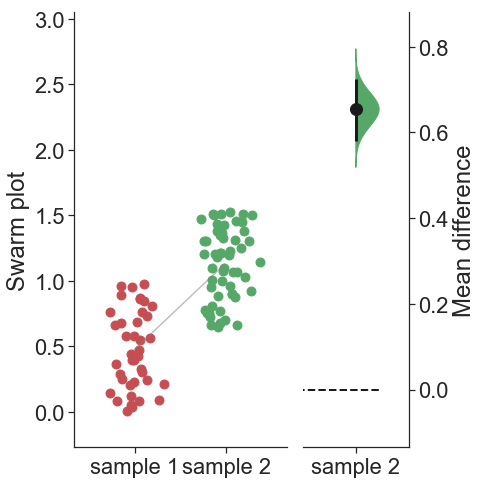

In [4]:
## Unpaired example:
input_ = {'sample 1': np.random.rand(40), 'sample 2': np.random.rand(55) + 0.6,
     'sample 3': np.random.rand(5) +2}
KEYS = list(input_.keys())
fig,axs = dpl.estimation_plot(input_, [KEYS[:2]], SMOOTH=[1,3], operation=np.mean,
                              color_palette=['r', 'g', 'b'], stat=False, paired=False,
                              spread=3, SWARM=1, vertical=0, figsize=(6,8),
                             bootPlot_kw={'ci_size':12,'ci_width':3,'ref_width':2})

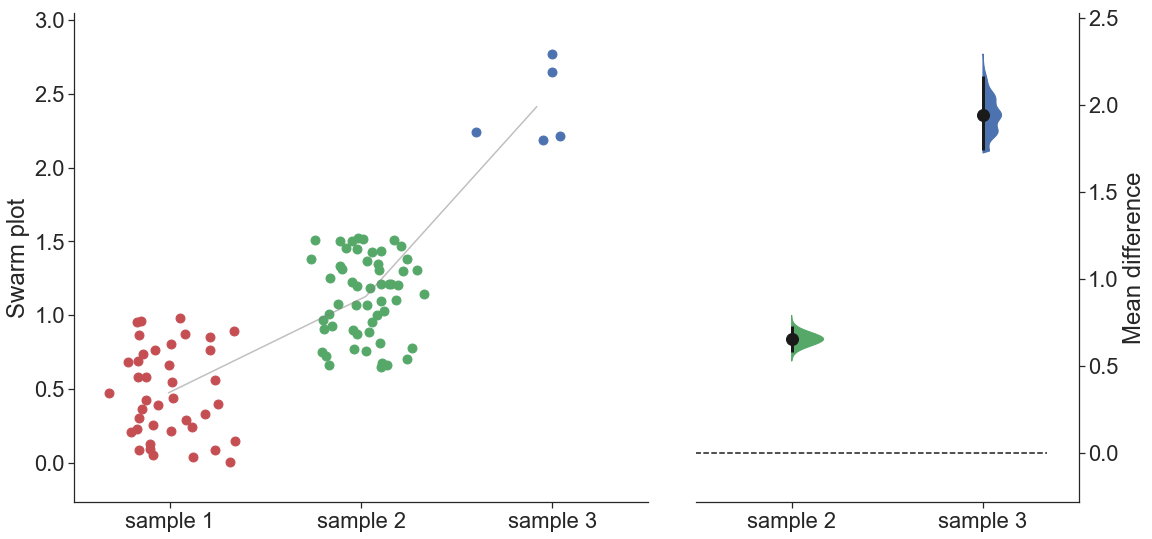

In [5]:
fig,axs = dpl.estimation_plot(input_, [KEYS], SMOOTH=[1,3], operation=np.mean,
                              color_palette=['r', 'g', 'b'], stat=False, paired=False,
                             vertical=0, EXC=0)

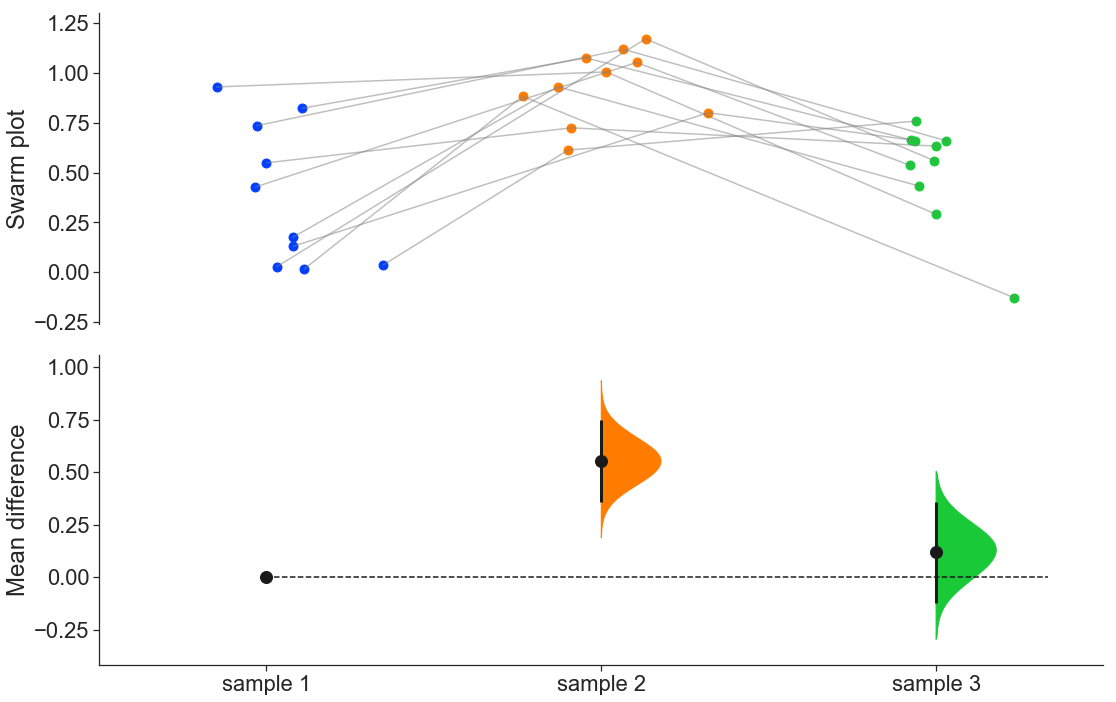

In [6]:
## Paired example:
input_ = {'sample 1': np.random.rand(10), 'sample 2': np.random.rand(10) + 0.4,
     'sample 3': np.random.rand(10) - 0.2}
KEYS = list(input_.keys())
fig,m,ci = dpl.estimation_plot(input_, [KEYS], trend=1, SMOOTH=[1,3], paired=True)

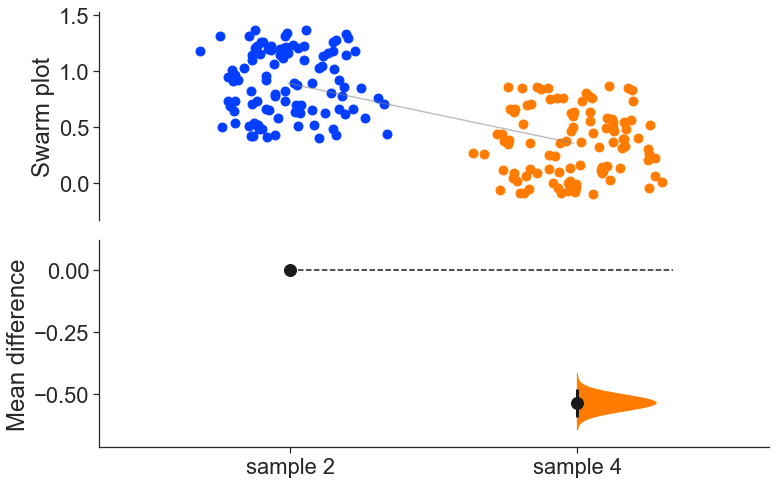

In [11]:
## Median difference example:
input_ = {'sample 1': np.random.rand(100), 'sample 2': np.random.rand(100) + 0.4,
     'sample 3': np.random.rand(200) - 0.2, 'sample 4': np.random.rand(100) - 0.1}
KEYS = list(input_.keys())
fig,axs = dpl.estimation_plot(input_, [[KEYS[1],KEYS[3]]], trend=1, operation=np.mean, nsh=10000,
                              stat=0, SMOOTH=[1,3], spread=3)

In [17]:
lista = [[KEYS[1],KEYS[3]], [KEYS[1],KEYS[3]], [KEYS[1],KEYS[3]]] #, [KEYS[2]]]
nc = 0
for l in lista:
    nc+=len(l)

print(nc)

6


[[0.4184102837103636], [0.04483829224387553]] [[[0.34040469559012915, 0.5026363859362474]], [[-0.03268941524156485, 0.12625980943556697]]]


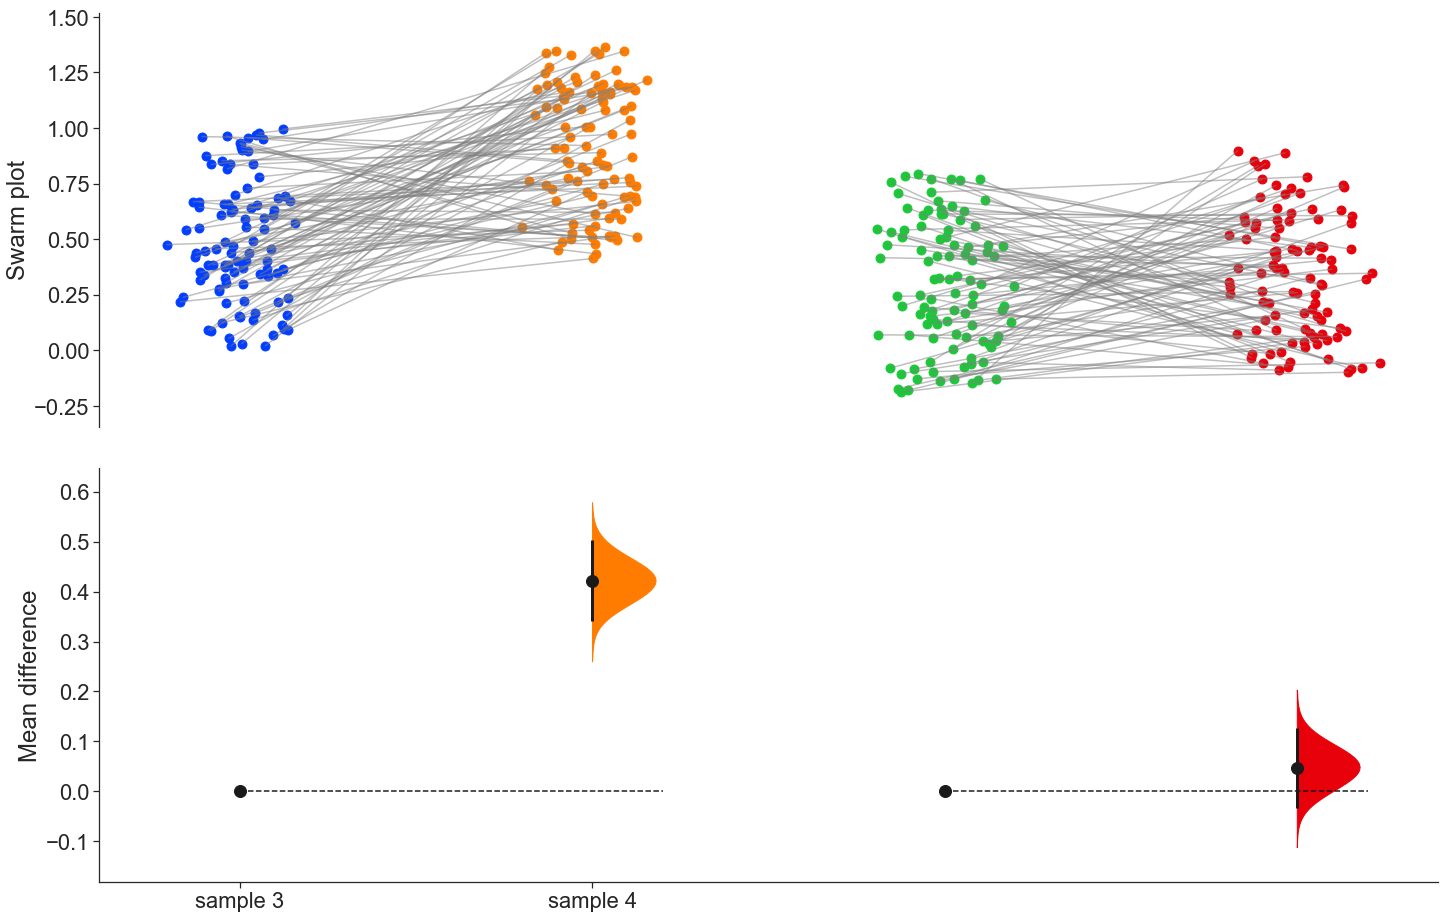

In [10]:
## Multiple controls
input_ = {'sample 1': np.random.rand(100), 'sample 2': np.random.rand(100) + 0.4,
         'sample 3': np.random.rand(100) - 0.2, 'sample 4': np.random.rand(100) - 0.1}
KEYS = list(input_.keys())
fig,m,ci = dpl.estimation_plot(input_, [KEYS[:2], KEYS[2:]], paired=True,\
                          vertical=1, nsh=5000, spread=5)
print(m,ci)